In [1]:
import pandas as pd

# Load the datasets
mm_data = pd.read_csv(r'C:\Users\A\Desktop\The Investment Compass\M&M.NS.csv')
tata_motors_data = pd.read_csv(r'C:\Users\A\Desktop\The Investment Compass\TATAMOTORS.NS.csv')

# Convert the 'Date' column to datetime format and set it as the index
mm_data['Date'] = pd.to_datetime(mm_data['Date'])
mm_data.set_index('Date', inplace=True)

tata_motors_data['Date'] = pd.to_datetime(tata_motors_data['Date'])
tata_motors_data.set_index('Date', inplace=True)

# Check for missing values and fill them if necessary
mm_data.fillna(method='ffill', inplace=True)
tata_motors_data.fillna(method='ffill', inplace=True)


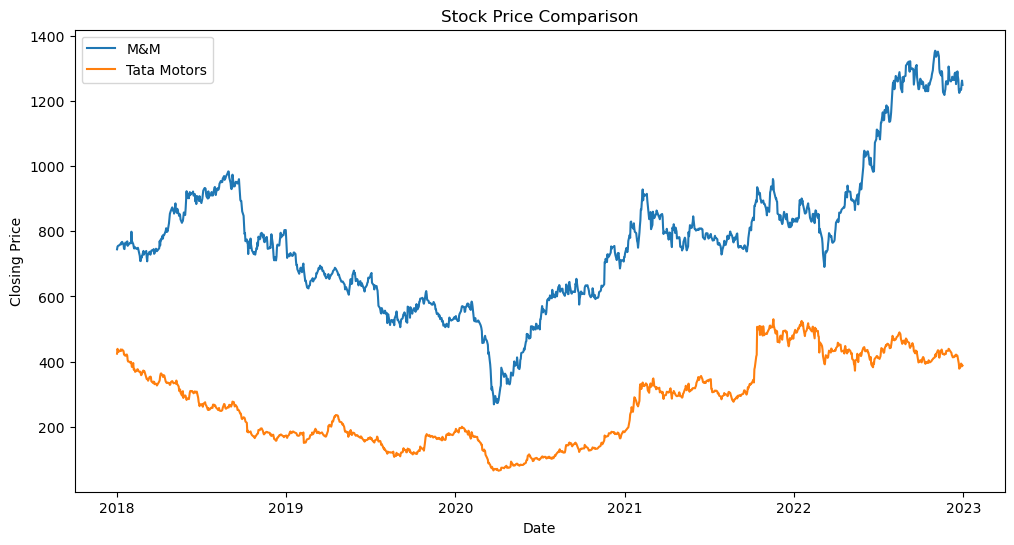

In [2]:
import matplotlib.pyplot as plt

# Plot the closing prices of both companies
plt.figure(figsize=(12, 6))
plt.plot(mm_data['Close'], label='M&M')
plt.plot(tata_motors_data['Close'], label='Tata Motors')
plt.title('Stock Price Comparison')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [3]:
# Example: Compare average closing prices
average_mm_close = mm_data['Close'].mean()
average_tata_close = tata_motors_data['Close'].mean()

print(f"Average Closing Price of M&M: {average_mm_close}")
print(f"Average Closing Price of Tata Motors: {average_tata_close}")


Average Closing Price of M&M: 773.5125405250807
Average Closing Price of Tata Motors: 272.9506473697408


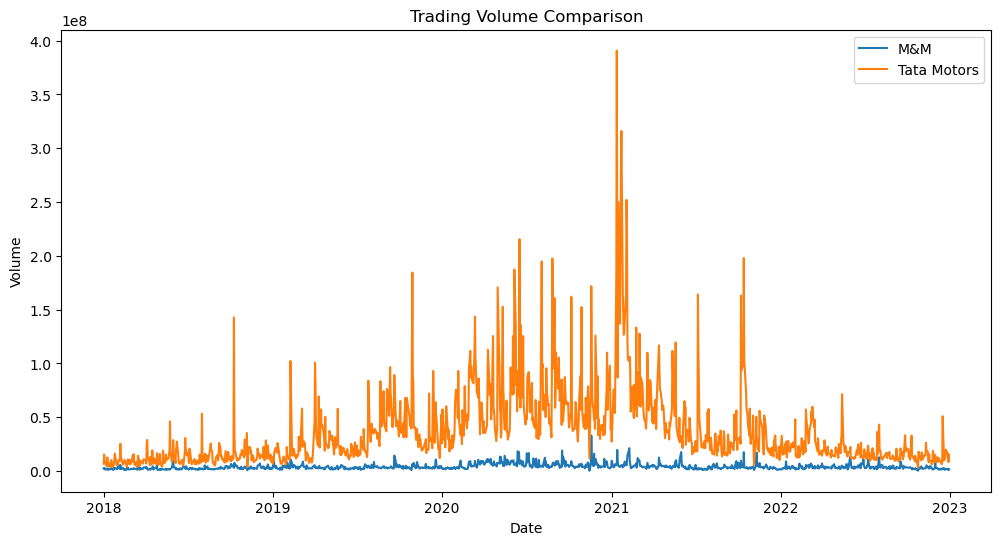

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(mm_data['Volume'], label='M&M')
plt.plot(tata_motors_data['Volume'], label='Tata Motors')
plt.title('Trading Volume Comparison')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


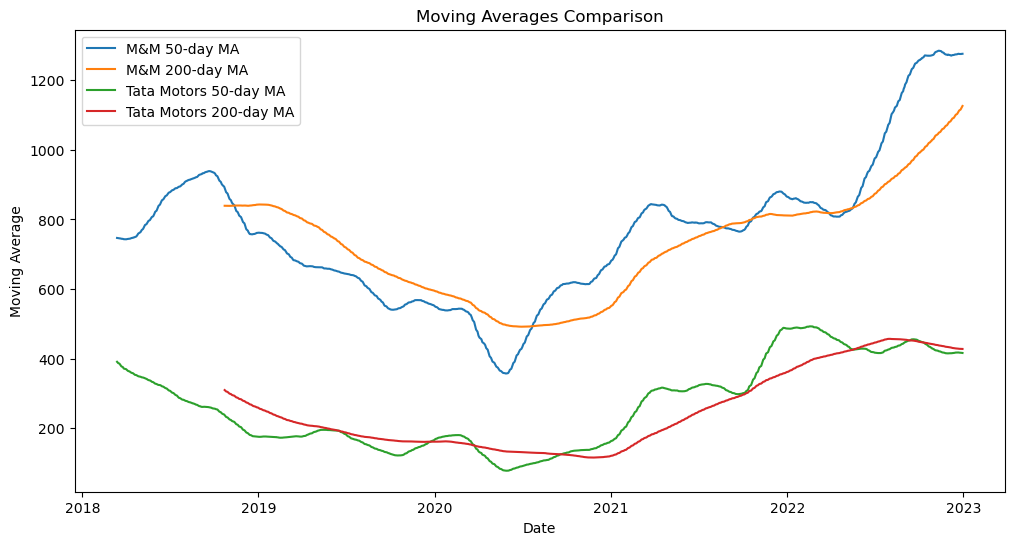

In [5]:
mm_data['MA50'] = mm_data['Close'].rolling(window=50).mean()
mm_data['MA200'] = mm_data['Close'].rolling(window=200).mean()

tata_motors_data['MA50'] = tata_motors_data['Close'].rolling(window=50).mean()
tata_motors_data['MA200'] = tata_motors_data['Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(mm_data['MA50'], label='M&M 50-day MA')
plt.plot(mm_data['MA200'], label='M&M 200-day MA')
plt.plot(tata_motors_data['MA50'], label='Tata Motors 50-day MA')
plt.plot(tata_motors_data['MA200'], label='Tata Motors 200-day MA')
plt.title('Moving Averages Comparison')
plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.legend()
plt.show()


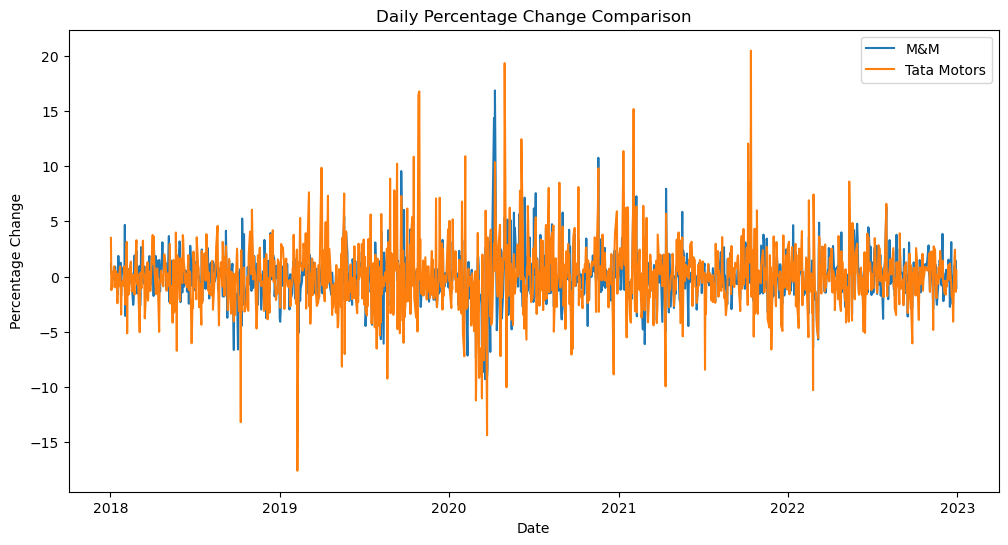

In [6]:
mm_data['Pct Change'] = mm_data['Close'].pct_change() * 100
tata_motors_data['Pct Change'] = tata_motors_data['Close'].pct_change() * 100

plt.figure(figsize=(12, 6))
plt.plot(mm_data['Pct Change'], label='M&M')
plt.plot(tata_motors_data['Pct Change'], label='Tata Motors')
plt.title('Daily Percentage Change Comparison')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.show()


In [7]:
mm_volatility = mm_data['Pct Change'].std()
tata_volatility = tata_motors_data['Pct Change'].std()

print(f"Volatility of M&M: {mm_volatility}")
print(f"Volatility of Tata Motors: {tata_volatility}")


Volatility of M&M: 2.1623976417341426
Volatility of Tata Motors: 3.1103795752649552


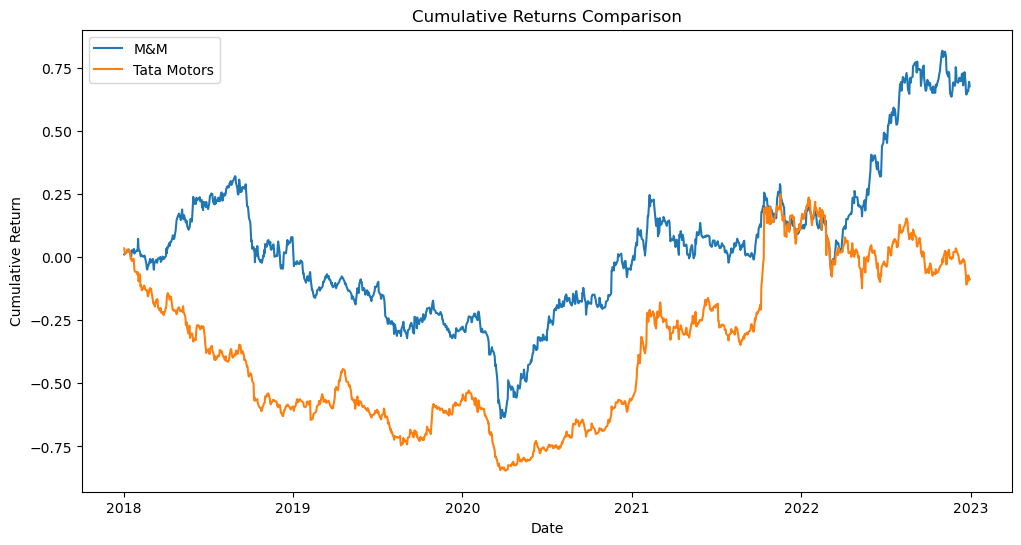

In [8]:
mm_data['Cumulative Return'] = (1 + mm_data['Pct Change'] / 100).cumprod() - 1
tata_motors_data['Cumulative Return'] = (1 + tata_motors_data['Pct Change'] / 100).cumprod() - 1

plt.figure(figsize=(12, 6))
plt.plot(mm_data['Cumulative Return'], label='M&M')
plt.plot(tata_motors_data['Cumulative Return'], label='Tata Motors')
plt.title('Cumulative Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()
